In [1]:
from sklearn.cluster import DBSCAN
from tqdm.notebook import tqdm
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
plt.style.use('ggplot')

# K-means

## Теоретическая справка

Здесь нужно вставить теорию про inertia какая вообще идея в кластеризации типа уменьшение внутрикластерного расстояния, определение, что это такое и тп. Формулы, что внутрикластерное расстояние эквивалентно сумме растояний от объектов до соответствующих центроидов (вывод эквивалентности формул при использовании квадрата евклидова расстояния).

Сам алгоритм k-means.

Доказательство сходимости к локальному оптимуму (что на каждой итерации целевое значение не ухудшается при использовании квадрата евклидова расстояния) по шагам алгоритма.

Пусть $X =\{x_1, x_2, ..., x_n\}$ -- множество рассматриваемых объектов, $C_1, C_2, ..., C_K$ -- разбиение $X$, $d$ -- функция расстояния, заданная на $X$.

Внутрикластерным расстоянием $W(C_k)$ в кластере $C_k$ называют сумму попарных расстояний между всеми объектами этого кластера, то есть

$$
W\left(C_{k}\right)=\sum_{x_i, x_{i^{\prime}} \in C_{k}} d \left(x_{i}, x_{i^{\prime}}\right), \quad k \in \{1, 2, ..., K\}.
$$

В обозначениях предыдущего определения, средним внутрикластерным расстоянием в кластере $C_k$ называется величина, равная
$$
\frac{W\left(C_{k}\right)}{\left|C_{k}\right|}, \quad k \in \{1, 2, ..., K\},
$$
где $\left|C_{k}\right|$ -- количество объектов, принадлежащих кластеру $C_{k}$.

Чтобы минимизировать средние внутрикластерные расстояния, можно попробовать минимизировать их сумму по всем кластерам, то есть минимизировать следующее выражение:

$$
\sum_{k=1}^{K}\frac{W\left(C_{k}\right)}{\left|C_{k}\right|} = \sum_{k=1}^{K} \frac{1}{\left|C_{k}\right|}\sum_{x_i, x_{i^{\prime}} \in C_{k}} d \left(x_{i}, x_{i^{\prime}}\right).
$$

В качестве функции расстояния будем использовать не евклидово расстояние, а его квадрат. При таком выборе функции расстояния близкие объекты (евклидово расстояние между которыми меньше единицы) вносят меньший вклад в минимизируемую сумму, а далекие (евклидово расстояние между которыми больше единицы) -- больший. Само минимизируемое выражение выглядит следующим образом:

$$
\sum_{k=1}^{K} \frac{1}{\left|C_{k}\right|}\sum_{x_i, x_{i^{\prime}} \in C_{k}} d_E ^2\left(x_{i}, x_{i^{\prime}}\right).
$$

И последний технический, но важный аспект

Оказывается, при использовании в качестве функции расстояния квадрата евклидова расстояния, справедливо следующее равенство

$$
\frac{1}{|C_{k} |} \sum_{x_i,x_{i^{\prime}}\in C_{k}} d_E^2(x_i, x_{i'}) = 2 \sum_{x_i \in C_{k}} d_E^2(x_i, \overline{x}_k),
$$

где $\overline{x}_k$ — центроид кластера $k$.

Итак, пришло время сформулировать алгоритм применения метода K-средних. Пусть имеется набор данных $X = (x_1, x_2, ..., x_n)$ объема $n$ с числовыми признаками, где

$$
x_i = (x_{i1}, x_{i2}, ..., x_{ip}), \quad i \in \{1, 2, ..., n\}.
$$

*    Выбирается число $K \in \mathbb N$.

*    $\textbf{Инициализация.}$ Каждый объект случайным образом относят к какому-то кластеру из набора $C_1, C_2, ..., C_K$.

*    $\textbf{Нахождение центроидов.}$ Для каждого кластера $C_k$ находят координаты центроида:

$$
\overline x_k = (\overline x_{k1}, \overline x_{k2}, ..., \overline x_{kp}), \quad
\overline{x}_{k j}=\frac{1}{\left|C_{k}\right|}\sum_{x_i \in C_{k}} x_{i j},
$$

где $k \in \{1, 2, \dots, K \}, \ j \in \{1, 2, \dots, p\}$.

*    $\textbf{Вычисление квадратов расстояний до центроидов.}$ Находят квадрат евклидова расстояния от $i$-го объекта до центроида каждого кластера:

$$
d_E^2(x_i, \overline{x}_k)=\sum_{j=1}^{p}\left(x_{i j}-\overline{x}_{k j}\right)^{2},$$
$$ k \in \{1, 2, \dots, K \}, \quad i \in \{1, 2, \dots, n \}.
$$

*    $\textbf{Перераспределение.}$ Объект $x_i$ относят к кластеру с наиболее близким к нему центроидом, то есть $x_i \in C_{k^*}$, где $k^\ast$ -- любое из решений задачи

$$
\text{Argmin}_{k \in \{1, 2, ..., K\}} d_E^2(x_i, \overline{x}_k).
$$

Отметим, что если среди решений поставленной задачи есть номер текущего кластера, то объект не меняет своей кластерной принадлежности.

*    Шаги $2$ -- $6$ повторяются, пока объекты не перестанут перераспределяться по кластерам

## Генерация датасета

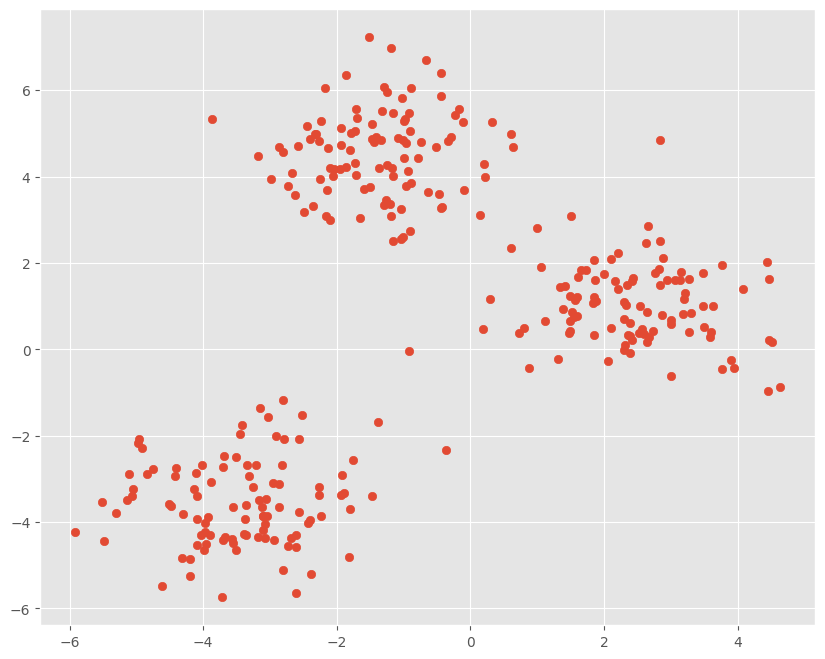

In [2]:
n_centers = 3
n_dots = 100
n_samples = n_centers * n_dots
random_state = 42

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=n_centers, center_box=(-5.0, 5.0))

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.show()

## Реализация метода вручную

In [3]:
# Число k
k = 3

Инициализация меток кластеров

In [4]:
def initialize_randomly(random_state, X, k):
    """
    Инициализирует метки кластеров (от 0 до k не включительно)
    случайным образом при помощи np.random.randint

    Args:
        random_state (int):  Зерно для генератора случайных чисел (np.random.seed()).
        X (ndarray): Массив данных (форма n_samples, n_features).
        k (int): Количество кластеров.

    Returns:
        ndarray: Массив меток кластеров для каждой точки данных (форма n_samples,).
    """
    np.random.seed(random_state)
    n_samples = X.shape[0]
    labels = np.random.randint(0, k, size=n_samples)
    return labels

assert np.equal(initialize_randomly(random_state, X, k)[:10], np.array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2])).all()

In [5]:
clusters = initialize_randomly(random_state, X, k)

Нахождение центроидов

In [6]:
def get_centroids(X, clusters):
    """
    Вычисляет центроиды для каждого кластера.

    Args:
        X (ndarray): Массив данных (форма n_samples, n_features).
        clusters (ndarray): Массив меток кластеров для каждой точки данных (форма n_samples,).

    Returns:
        ndarray: Массив координат центроидов (форма k, n_features).
    """
    k = len(np.unique(clusters))  # Определяем количество кластеров
    n_features = X.shape[1]
    centroids = np.zeros((k, n_features))

    for cluster_label in range(k):
        # Выбираем все точки, принадлежащие текущему кластеру
        points_in_cluster = X[clusters == cluster_label]
        # Вычисляем среднее по каждой фиче — это и есть центроид
        centroids[cluster_label] = points_in_cluster.mean(axis=0)

    return centroids

assert np.isclose(get_centroids(X, clusters), np.array([[-1.03358594,  0.73421037], [-1.02480976,  0.14279789], [-0.38220266,  1.07982105]])).all()

In [7]:
centroids = get_centroids(X, clusters)

Вычисление квадратов расстояний до центроидов

In [8]:
def squared_euclidean_distance(obj, centroids):
    """
    Вычисляет квадрат евклидова расстояния между точкой данных и каждым центроидом.

    Args:
        obj (ndarray): Точка данных (форма n_features,).
        centroids (ndarray): Массив центроидов (форма k, n_features).

    Returns:
        ndarray: Массив квадратов евклидовых расстояний между точкой данных и каждым центроидом (форма k,).
    """
    # Вычисляем разницу между точкой и каждым центроидом: (x - μ_i)
    diff = obj - centroids  # форма: (k, n_features)

    # Квадрат евклидова расстояния — это сумма квадратов разностей по каждой фиче
    squared_distances = np.sum(diff ** 2, axis=1)  # суммируем по признакам (axis=1)

    return squared_distances

assert np.isclose(squared_euclidean_distance(X[0], centroids), np.array([33.45327436, 27.91077581, 41.20298604])).all()

Основной цикл

In [9]:
def kmeans_algorithm(X, k, random_state, max_iter=1000):
    """
    Реализует алгоритм K-means. Если алгоритм не сошелся за max_iter, вывести
    соответствующее оповещение на экран.

    Args:
        X (ndarray): Массив данных (форма n_samples, n_features).
        k (int): Количество кластеров.
        random_state (int): Зерно для генератора случайных чисел.
        max_iter (int): Максимальное количество итераций.

    Returns:
        tuple: Кортеж, содержащий:
            - ndarray: Массив меток кластеров для каждой точки данных (форма n_samples,).
            - int: Шаг, на котором сошелся алгоритм.
    """

    # Инициализация меток кластеров случайным образом
    clusters = initialize_randomly(random_state, X, k)

    # Предыдущие метки для проверки сходимости
    prev_clusters = np.copy(clusters)

    # Выполняем итерации до max_iter
    for step in range(max_iter):
        # Пересчитываем центроиды по текущим кластерам
        centroids = get_centroids(X, clusters)

        # Назначаем каждую точку ближайшему центроиду
        for i in range(X.shape[0]):
            # Вычисляем квадраты расстояний от точки до центроидов
            distances = squared_euclidean_distance(X[i], centroids)
            # Назначаем точку кластеру с минимальным расстоянием
            clusters[i] = np.argmin(distances)

        # Проверяем сходимость: если метки не изменились — алгоритм сошёлся
        if np.array_equal(clusters, prev_clusters):
            return clusters, step + 1  # возвращаем кластеры и номер шага

        # Обновляем предыдущие метки
        prev_clusters = np.copy(clusters)

    # Если не сошёлся за max_iter итераций
    print("Алгоритм не сошелся за максимальное количество итераций.")
    return clusters, max_iter

In [10]:
clusters, conv_iter = kmeans_algorithm(X, k, random_state, max_iter=1000)
print('Converged at iteration {}'.format(conv_iter))

Converged at iteration 5


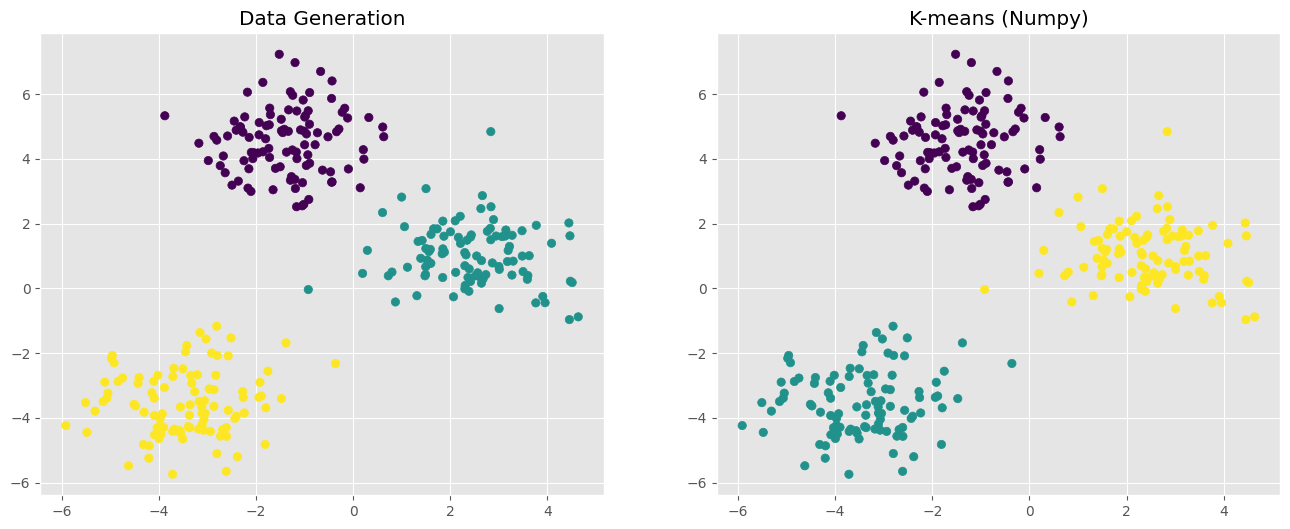

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.scatter(X[:, 0], X[:, 1], c=y)
ax1.set_title('Data Generation')
ax2.scatter(X[:, 0], X[:, 1], c=clusters)
ax2.set_title('K-means (Numpy)')
plt.show()

## Инициализация через центроиды и библиотечная реализация

In [12]:
def initialize_centroids(X,k,random_state):
    """
    Инициализирует центроиды случайными точками из пространства данных.
    Сначала установить зерно генератора np.random.seed, затем, используя
    np.random.random_sample, сгенерировать массив координат центроидов

    Args:
        X (ndarray): Массив данных (форма n_samples, n_features).
        k (int): Количество кластеров.
        random_state (int): Зерно для генератора случайных чисел.

    Returns:
        ndarray: Массив центроидов (форма k, n_features).
    """
    np.random.seed(random_state)
    n_features = X.shape[1]
    # Генерируем k точек
    centroids = np.random.random_sample((k, n_features))
    return centroids

assert np.isclose(initialize_centroids(X,k,random_state), np.array([[0.37454012, 0.95071431], [0.73199394, 0.59865848], [0.15601864, 0.15599452]])).all()

In [13]:
def kmeans_algorithm(X, k, random_state, max_iter=1000):
    """
    Реализует алгоритм K-means. Если алгоритм не сошелся за max_iter, вывести
    соответствующее оповещение на экран.

    Args:
        X (ndarray): Массив данных (форма n_samples, n_features).
        k (int): Количество кластеров.
        random_state (int): Зерно для генератора случайных чисел.
        max_iter (int): Максимальное количество итераций.

    Returns:
        tuple: Кортеж, содержащий:
            - ndarray: Массив меток кластеров для каждой точки данных (форма n_samples,).
            - int: Шаг, на котором сошелся алгоритм.
    """
    # Устанавливаем seed для воспроизводимости
    np.random.seed(random_state)

    # Инициализируем центроиды случайными точками
    centroids = initialize_centroids(X, k, random_state)

    n_samples, n_features = X.shape

    for step in range(max_iter):
        # Сохраняем предыдущие центроиды для проверки сходимости
        prev_centroids = np.copy(centroids)

        # Назначаем каждой точке ближайший кластер
        clusters = np.zeros(n_samples, dtype=int)
        for i in range(n_samples):
            distances = squared_euclidean_distance(X[i], centroids)
            clusters[i] = np.argmin(distances)

        # Пересчитываем центроиды как среднее по точкам кластера
        for j in range(k):
            cluster_points = X[clusters == j]
            if len(cluster_points) > 0:
                centroids[j] = cluster_points.mean(axis=0)
            # Если кластер пустой — оставляем центроид без изменений

        # Проверяем сходимость: центроиды не изменились
        if np.allclose(centroids, prev_centroids):
            return clusters, step + 1  # сходимость достигнута

    # Если не сошёлся за max_iter
    print("Алгоритм не сошелся за максимальное количество итераций.")
    return clusters, max_iter

In [14]:
clusters, conv_iter = kmeans_algorithm(X, k, random_state, max_iter=1000)
print('Converged at iteration {}'.format(conv_iter))

Converged at iteration 3


### Sklearn

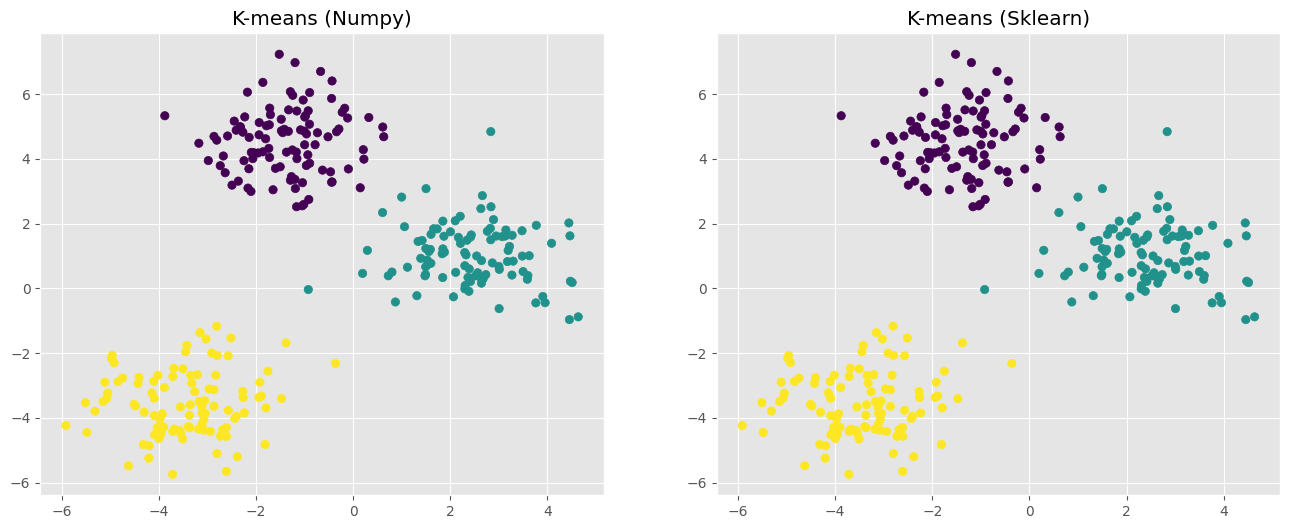

In [15]:
kmeans = KMeans(n_clusters=3, init=initialize_centroids(X,k,random_state)).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.scatter(X[:, 0], X[:, 1], c=clusters)
ax1.set_title('K-means (Numpy)')
ax2.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
ax2.set_title('K-means (Sklearn)')
plt.show()

# DBSCAN

## Теоретическая справка

DBSCAN (Density-based spatial clustering of applications with noise) -- плотностный алгоритм пространственной кластеризации с присутствием шума. Если вдуматься в само название алгоритма, то становится понятной и идея: объекты составляют один и тот же кластер, если все они плотно расположены друг к другу. Что значит плотно? Это значит, что  рядом с каждым объектом кластера есть достаточно много соседей -- элементов этого же кластера.

DBSCAN справляется с нахождением как плотных шаровых сгустков, так и ленточных кластеров. При фиксированных параметрах модели количество кластеров определяется однозначным образом.

**Основные определения:**

Пусть $X = (x_1, x_2, ..., x_n)$ - набор данных объема $n$, где $x_i \in \mathbb{R}^p$ (каждый объект описывается $p$ числовыми признаками).  Пусть $d$ - выбранная функция расстояния в $\mathbb{R}^p$.

*   **Замкнутый шар:** Пусть $\varepsilon > 0$. Множество
    
    $$
    \overline{B}(x_0, \varepsilon) = \{y \in X: \ d(x_0, y) \leq \varepsilon\}
    $$

    называется замкнутым шаром в $X$ с центром в $x_0$ и радиуса $\varepsilon$.  $|\overline{B}(x_0, \varepsilon)|$ - количество элементов в множестве $\overline{B}(x_0, \varepsilon)$.

*   **Соседи:** Пусть $\varepsilon > 0$. Элементы множества $\overline{B}(x_0, \varepsilon)$ называются соседями элемента $x_0$.  Предполагается, что функция расстояния $d$ обладает свойствами $d(x, x) = 0$ и $d(x, x') = d(x', x)$.

*   **Корневой объект:** Пусть $m \in \mathbb{N}$ - некоторое наперед заданное число. Если

    $$
    |\overline{B}(x_0, \varepsilon)| \geq m,
    $$

    то объект $x_0$ называется корневым объектом.

*   **Граничный объект (граничная точка):** Некорневой объект, не являющийся выбросом. Граничные объекты могут менять свою кластерную принадлежность при перезапуске алгоритма даже с неизменными параметрами.

**Алгоритм DBSCAN:**

1.  Выбираются $\varepsilon > 0$ и $m \in \mathbb{N}$. Пусть $i = 1$.
2.  Находится какой-нибудь корневой объект $x$ в $X$. Если таковых нет, то производится переход к пункту 7.
3.  Все соседи объекта $x$ помещаются в кластер $C_i$.
4.  Для каждого элемента из $C_i$ проверяется, является ли он корневым. Если является, то все соседи найденного корневого элемента добавляются к $C_i$.
5.  Пункт 4 повторяется до тех пор, пока состав кластера $C_i$ не перестанет изменяться.
6.  Полагается $X = X \setminus C_i$, $i = i + 1$. Производится переход к пункту 2.
7.  Все объекты множества $X$, если они есть, помещаются в отдельный кластер - выбросы. Кластеризация завершена.

## Генерация данных

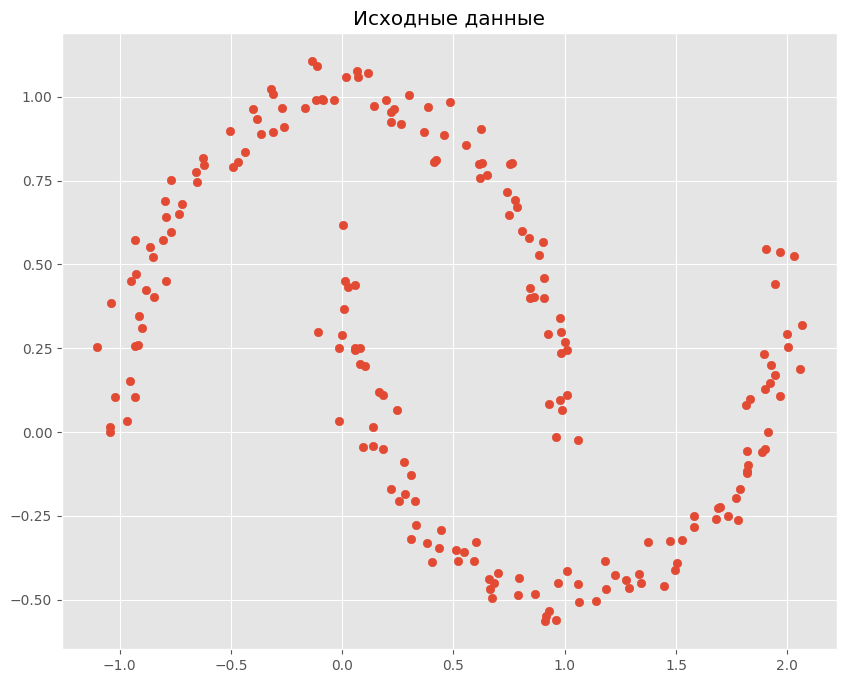

In [16]:
# Создадим датасет в форме полумесяцев, чтобы показать возможности DBSCAN
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.title("Исходные данные")
plt.show()

## Реализация DBSCAN вручную

In [17]:
def euclidean_distance(x1, x2):
    """
    Вычисляет евклидово расстояние между двумя точками.

    Args:
        x1 (ndarray): Координаты первой точки.
        x2 (ndarray): Координаты второй точки.

    Returns:
        float: Евклидово расстояние между точками.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

assert np.isclose(euclidean_distance(np.array([1,2]), np.array([3,4])), 8**0.5)

In [18]:
def region_query(X, x_center, epsilon):
    """
    Находит соседей точки x_center в наборе данных X.

    Args:
        X (ndarray): Набор данных.
        x_center (ndarray): Точка, для которой ищутся соседи.
        epsilon (float): Радиус окрестности.

    Returns:
        list: Список индексов соседей точки x_center в X.
    """
    neighbors = []
    for i, point in enumerate(X):
        if euclidean_distance(x_center, point) <= epsilon:
            neighbors.append(i)
    return neighbors

assert np.isclose(region_query(X[:3], np.array([1,1]), 0.5), np.array([2])).all()
assert np.isclose(region_query(X[:3], np.array([1,1]), 0.7), np.array([1,2])).all()

In [19]:
def is_core_object(X, x_index, epsilon, m):
    """
    Определяет, является ли объект корневым.

    Args:
        X (ndarray): Набор данных.
        x_index (int): Индекс объекта в X.
        epsilon (float): Радиус окрестности.
        m (int): Минимальное количество соседей.

    Returns:
        bool: True, если объект является корневым, False иначе.
    """
    x_center = X[x_index]
    neighbors = region_query(X, x_center, epsilon)
    return len(neighbors) >= m

assert is_core_object(X[:10], 7, 0.5, 3) == True
assert is_core_object(X[:10], 6, 0.5, 3) == False

In [20]:
def dbscan(X, epsilon, m):
    """
    Реализует алгоритм DBSCAN.

    Args:
        X (ndarray): Набор данных.
        epsilon (float): Радиус окрестности (eps).
        m (int): Минимальное количество соседей (min_pts).

    Returns:
        ndarray: Массив меток кластеров для каждой точки (-1 - выброс).
    """
    n = len(X)
    labels = np.zeros(n, dtype=int) - 1  # Изначально все точки помечены как выбросы (-1)
    cluster_id = 0

    for i in tqdm(range(n)):
        if labels[i] != -1:  # Уже обработан
            continue

        if is_core_object(X, i, epsilon, m):
            cluster_id += 1
            labels[i] = cluster_id
            neighbors = region_query(X, X[i], epsilon)

            # Расширяем кластер
            j = 0
            while j < len(neighbors):
                neighbor_index = neighbors[j]
                if labels[neighbor_index] == -1:  # Еще не посещен
                    labels[neighbor_index] = cluster_id
                elif labels[neighbor_index] == 0: #Граничный объект
                    labels[neighbor_index] = cluster_id
                neighbors_of_neighbor = region_query(X, X[neighbor_index], epsilon)
                if len(neighbors_of_neighbor) >= m: #сосед является корневым объектом
                    for neighbor in neighbors_of_neighbor:
                        if neighbor not in neighbors:
                            neighbors.append(neighbor)
                j += 1

    return labels

In [21]:
# Параметры DBSCAN
epsilon = 0.2
m = 5

# Запускаем DBSCAN
labels = dbscan(X, epsilon, m)

  0%|          | 0/200 [00:00<?, ?it/s]

## Сравнение с библиотечной реализацией (sklearn)

In [22]:
# Инициализация DBSCAN из sklearn
dbscan_sklearn = DBSCAN(eps=epsilon, min_samples=m)

# Обучение модели
clusters_sklearn = dbscan_sklearn.fit_predict(X)

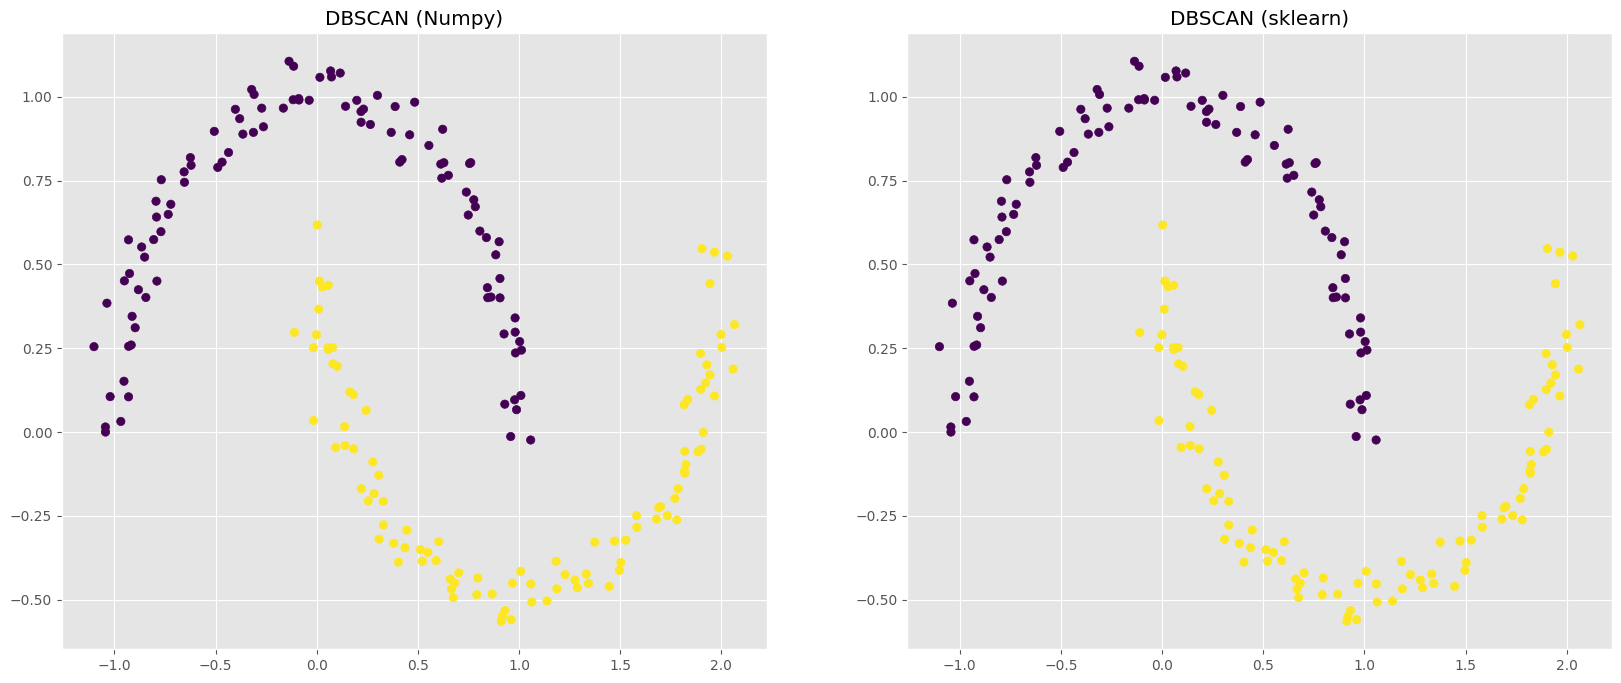

In [23]:
# Сравним результаты визуально (а также можно оценить метрики, если известна истинная кластеризация)

# Создаем фигуру и две подграфика в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Подграфик для вашей реализации DBSCAN
ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
ax1.set_title('DBSCAN (Numpy)')

# Подграфик для DBSCAN из sklearn
ax2.scatter(X[:, 0], X[:, 1], c=clusters_sklearn, cmap='viridis')
ax2.set_title('DBSCAN (sklearn)')

# Отображаем общую фигуру
plt.show()

**Важные замечания:**

*   При фиксированных параметрах алгоритма ($m$ и $\varepsilon$), корневые элементы, если они есть, распределяются по кластерам однозначно. То же самое касается и выбросов.  Однако, граничные объекты могут менять кластерную принадлежность в зависимости от порядка выбора корневых элементов.
*   Перед кластеризацией имеет смысл стандартизировать или нормировать признаки кластеризуемых объектов, так как понятия корневого объекта и соседей зависят от расстояния.
*   Подбор оптимальных параметров алгоритма DBSCAN является сложной задачей.